<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/01_Supervised_learning/13_GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient boosting
- The foundational sequential ensemble method where each new tree is trained to predict the negative gradient of the loss function from previous iterations.
- Trees are built one at a time, with each tree learning from the mistakes of the ensemble so far.
- The final prediction is the sum of all tree predictions multiplied by a learning rate. Powerful but prone to overfitting

# Gradient boosting in a nutshell :
Train first weak learner (tree) -> Compute negative gradient of loss function (psuedo-residuals) -> Train next weak learner on these residuals -> Add new predictions to previous ones (with learning rate) -> Repeat for N iterations
- Here the loss function is not always y_predicted-y_actual , thats only for squared loss. In reality the loss function can be squared or absolute loss for regression or logistic loss for classification.

[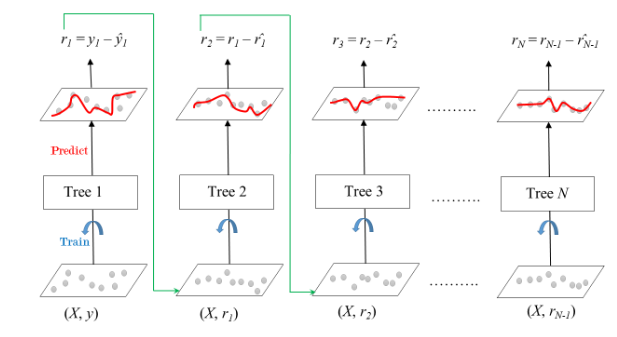](https://www.geeksforgeeks.org/machine-learning/ml-gradient-boosting/)

## XGBoost (Extreme Gradient Boosting)
- An optimized implementation of gradient boosting that adds several key improvements.
- It uses both first and second-order gradients (Hessian) for more precise updates, includes built-in L1 and L2 regularization to prevent overfitting.
- It handles missing values automatically, and performs tree pruning to remove splits that don't improve the model
## LightGBM (Light Gradient Boosting Machine)
- Microsoft's gradient boosting framework designed for speed and memory efficiency.
-  Its key innovation is using histogram-based algorithms and leaf-wise tree growth (instead of level-wise like XGBoost), which can be faster and use less memory.
-  It also includes automatic feature selection, handles categorical features natively without encoding, and is optimized for large datasets.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will use [Cencus dataset](https://www.kaggle.com/datasets/tawfikelmetwally/census-income-dataset) from kaggle for classification

In [11]:
df=pd.read_csv('/content/adult.csv')

In [12]:
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Final Weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   EducationNum    32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  capital loss    32561 non-null  int64 
 12  Hours per Week  32561 non-null  int64 
 13  Native Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df=df.drop(['Native Country','Education'],axis='columns')

In [15]:
df=pd.get_dummies(df,drop_first=True)

In [16]:
df.shape

(32561, 45)

In [17]:
df.head()

,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Gender_ Male,Income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,38,215646,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,True,False
3,53,234721,7,0,0,40,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False


In [18]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [20]:
def cross_val(classifier,num_splits=10):
  model=classifier
  scores=cross_val_score(model,x,y,cv=10)
  print(np.round(scores,2))
  print(scores.mean())

In [21]:
cross_val(XGBClassifier(n_estimators=5))

[0.85 0.86 0.86 0.85 0.86 0.86 0.86 0.87 0.87 0.86]
0.859095444776286


In [22]:
cross_val(XGBClassifier(n_estimators=10))

[0.85 0.87 0.87 0.86 0.86 0.87 0.86 0.87 0.87 0.87]
0.8645007747440969


In [23]:
cross_val(XGBClassifier(n_estimators=25))

[0.87 0.87 0.87 0.86 0.87 0.87 0.87 0.88 0.87 0.87]
0.8722399552956814


In [24]:
cross_val(XGBClassifier(n_estimators=50))

[0.87 0.87 0.88 0.87 0.87 0.87 0.87 0.88 0.88 0.87]
0.8733455215340384
